# Data preparation  : 
we will import the data from the following link  .


# Import the depencies  : 

In [71]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as  plt 

In [72]:
data_url  = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv" #putting the url of the data here . 

In [73]:
!wget /?

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [74]:
!wget  $data -O  data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [75]:
df = pd.read_csv(data_url)

In [76]:
df.head().T 

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [77]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [78]:
#change all the collumns to the lowercase 
df.columns  = df.columns.str.lower().str.replace(" " , "_")

In [79]:
#check the columns names again  
df.columns 

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [80]:
categories_columns  = df.select_dtypes(include = "object").columns

In [81]:
#print the categories columns :
print(categories_columns)

Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'totalcharges',
       'churn'],
      dtype='object')


In [82]:
for c in categories_columns: 
    df[c] = df[c].str.lower().str.replace(" " , "_")

In [83]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [84]:
print(df.dtypes["totalcharges"])

object


In [85]:
df["totalcharges"] = pd.to_numeric(df["totalcharges"] , errors = "coerce")

In [86]:
print(df.dtypes["totalcharges"])

float64


In [87]:
#check all the null values within our data set : 
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [88]:
df.shape

(7043, 21)

In [89]:
df.totalcharges  = df.totalcharges.fillna(0)

In [90]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [91]:
df .dtypes 

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [92]:
df.churn.unique()

array(['no', 'yes'], dtype=object)

In [93]:
df.churn  = (df.churn == "yes").astype(int)

In [94]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

In [95]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


In [96]:
type(df)

pandas.core.frame.DataFrame

# Setting up the validation framework .

In [97]:
from sklearn.model_selection import train_test_split 
df_train_full  , df_test   = train_test_split(df , test_size=0.2 , random_state=42)
df_train , df_validation = train_test_split(df_train_full,  test_size=0.25 , random_state=42)

In [98]:
df_train.shape , df_test.shape , df_validation.shape 

((4225, 21), (1409, 21), (1409, 21))

In [99]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
6157,6776-tlwoi,male,0,no,no,3,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,19.85,64.55,1
817,0036-ihmot,female,0,yes,yes,55,yes,no,fiber_optic,no,...,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),103.70,5656.75,0
6977,2843-cqmeg,male,0,no,no,24,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,49.70,1218.25,0
1932,3247-mhjkm,male,0,no,no,1,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,20.20,20.20,0
4168,1194-bhjyc,male,0,yes,no,61,no,no_phone_service,dsl,yes,...,yes,yes,yes,yes,two_year,yes,mailed_check,62.15,3778.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,1271-sjbgz,male,1,no,no,12,no,no_phone_service,dsl,no,...,yes,yes,no,yes,month-to-month,yes,electronic_check,43.65,526.95,1
1409,5977-ckhon,female,0,yes,yes,43,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,bank_transfer_(automatic),92.55,4039.00,0
6834,3635-jbpsg,female,0,no,no,15,no,no_phone_service,dsl,no,...,no,no,no,yes,two_year,yes,mailed_check,38.80,603.00,0
5685,4475-nvtlu,male,0,yes,yes,45,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,19.20,903.70,0


In [101]:
type(df_train)

pandas.core.frame.DataFrame

In [102]:
df_train  = df_train.reset_index(drop = True )
df_test  = df_test.reset_index(drop = True )
df_validation  = df_validation.reset_index(drop = True )

In [68]:
df_train, print("\n") , df_test, print("\n")  , df_validation

(      customerid  gender  seniorcitizen partner dependents  tenure  \
 0     6776-tlwoi    male              0      no         no       3   
 1     0036-ihmot  female              0     yes        yes      55   
 2     2843-cqmeg    male              0      no         no      24   
 3     3247-mhjkm    male              0      no         no       1   
 4     1194-bhjyc    male              0     yes         no      61   
 ...          ...     ...            ...     ...        ...     ...   
 4220  1271-sjbgz    male              1      no         no      12   
 4221  5977-ckhon  female              0     yes        yes      43   
 4222  3635-jbpsg  female              0      no         no      15   
 4223  4475-nvtlu    male              0     yes        yes      45   
 4224  2038-yseze  female              0      no         no      29   
 
      phoneservice     multiplelines internetservice       onlinesecurity  ...  \
 0             yes                no              no  no_interne

In [103]:
type(df_train)

pandas.core.frame.DataFrame

In [104]:
y_train = df_train["churn"].values
y_validation = df_validation["churn"].values
y_test = df_test["churn"].values

del df_train['churn']
del df_validation['churn']
del df_test['churn']

In [105]:
# based on the previous error i need to check if the column churn exist on all of them  . 

In [106]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,6776-tlwoi,male,0,no,no,3,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,19.85,64.55
1,0036-ihmot,female,0,yes,yes,55,yes,no,fiber_optic,no,yes,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),103.70,5656.75
2,2843-cqmeg,male,0,no,no,24,yes,no,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check,49.70,1218.25
3,3247-mhjkm,male,0,no,no,1,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,20.20,20.20
4,1194-bhjyc,male,0,yes,no,61,no,no_phone_service,dsl,yes,no,yes,yes,yes,yes,two_year,yes,mailed_check,62.15,3778.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1271-sjbgz,male,1,no,no,12,no,no_phone_service,dsl,no,no,yes,yes,no,yes,month-to-month,yes,electronic_check,43.65,526.95
4221,5977-ckhon,female,0,yes,yes,43,yes,yes,fiber_optic,no,no,yes,no,no,yes,month-to-month,yes,bank_transfer_(automatic),92.55,4039.00
4222,3635-jbpsg,female,0,no,no,15,no,no_phone_service,dsl,no,yes,no,no,no,yes,two_year,yes,mailed_check,38.80,603.00
4223,4475-nvtlu,male,0,yes,yes,45,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,19.20,903.70


# EDA 
* check if there is any missing values . 
* look at the target variable (churn) . 
* loot at the numerical features and categorical features .  

In [107]:
# check all the missing values .  
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [109]:
value_counts  = df["churn"].value_counts()

In [113]:
import matplotlib.pyplot as plt

plt.bar(x = df["churn"])
plt.title('Distribution of Target Variable')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend()
plt.show()


TypeError: bar() missing 1 required positional argument: 'height'

In [114]:
import seaborn as sns 
def plot_target_v(dataframeS):
    sns.countplot(x= dataframeS)
    plt.show()

    

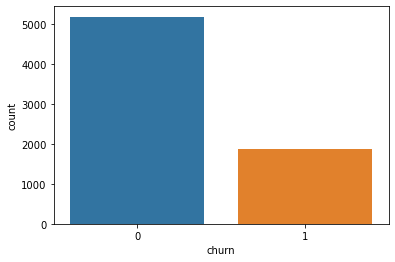

In [115]:
plot_target_v(df["churn"])

In [117]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

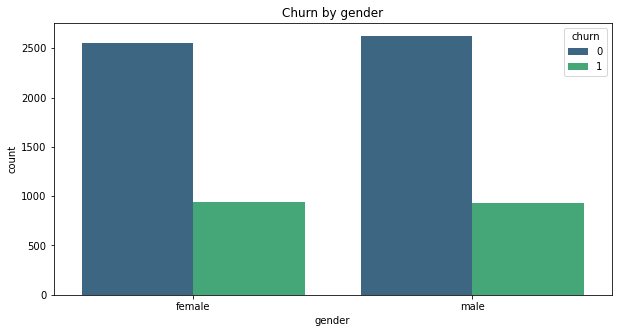

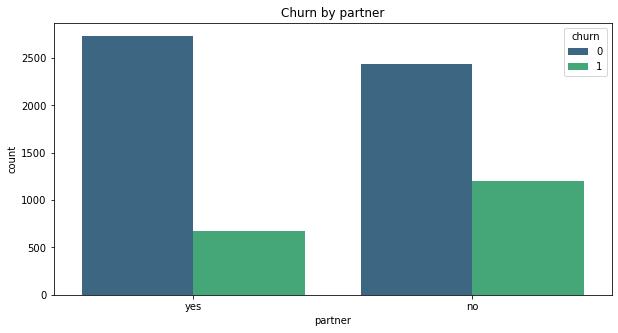

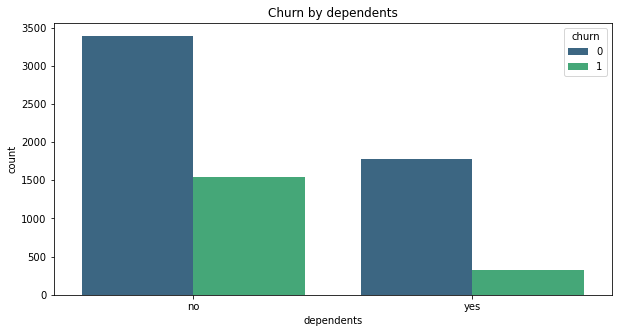

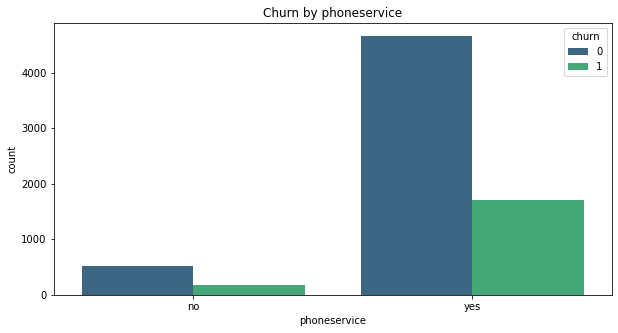

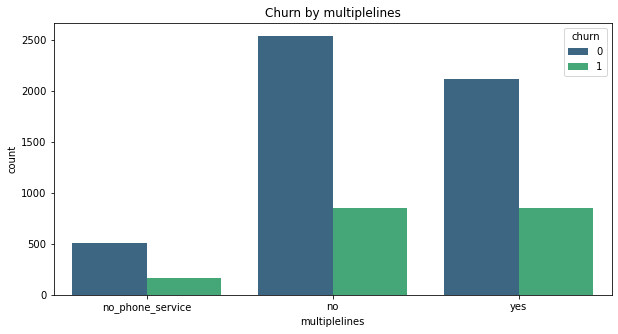

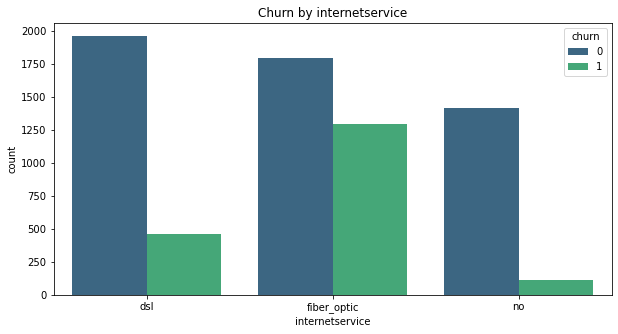

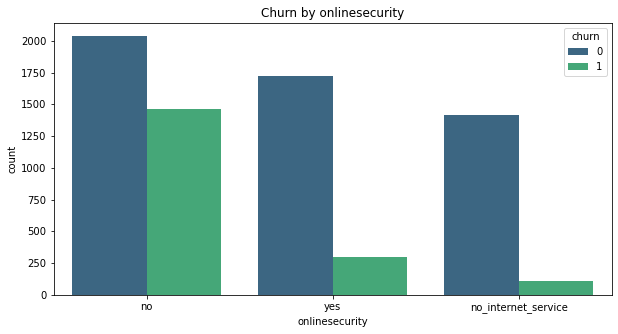

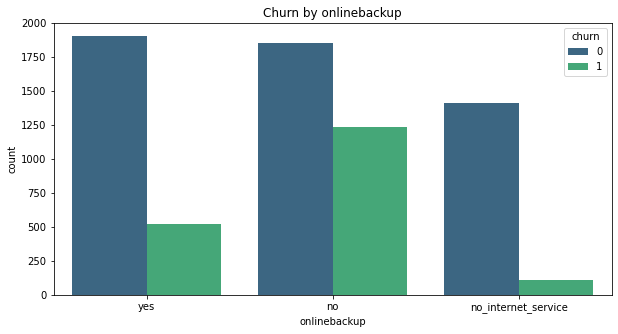

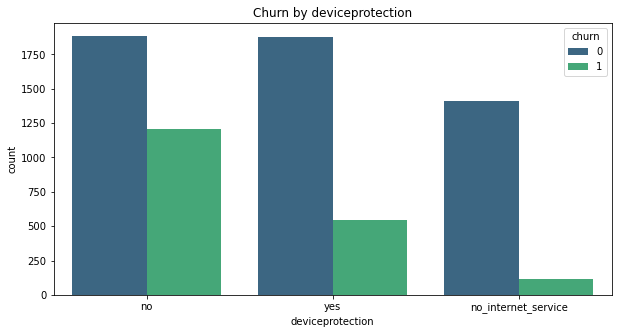

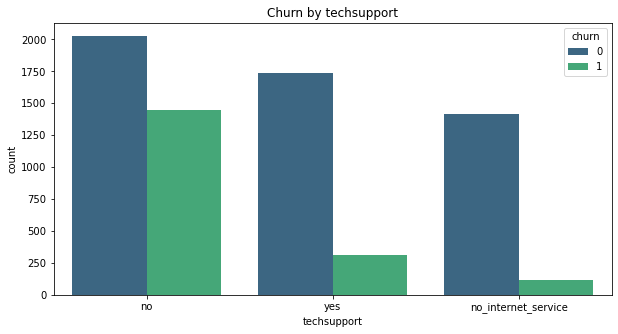

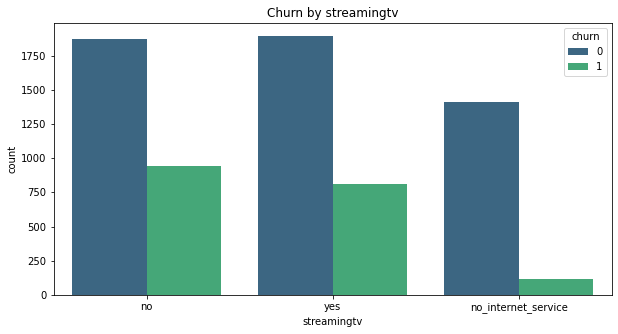

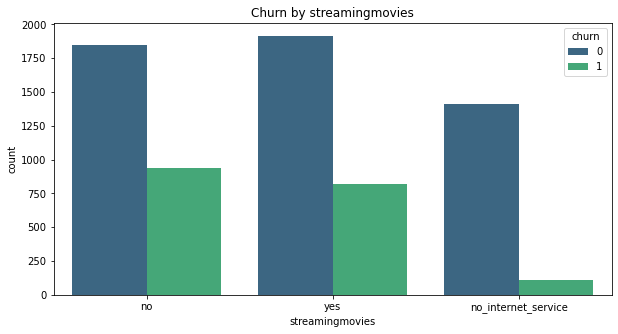

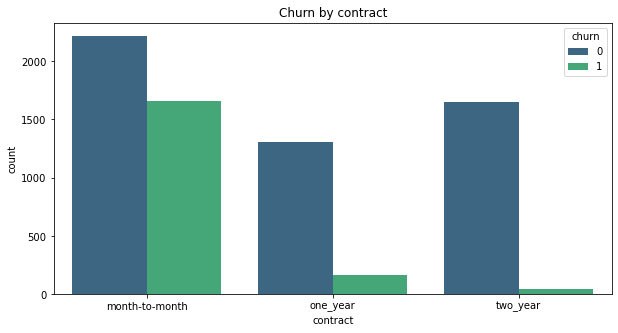

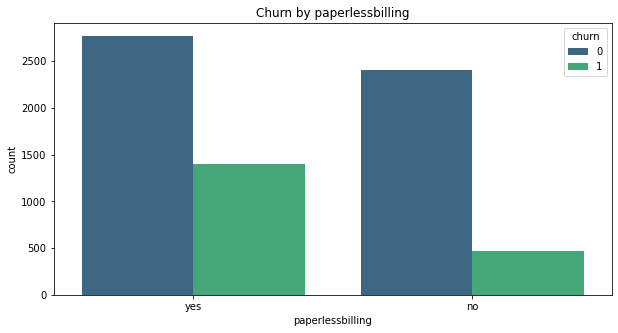

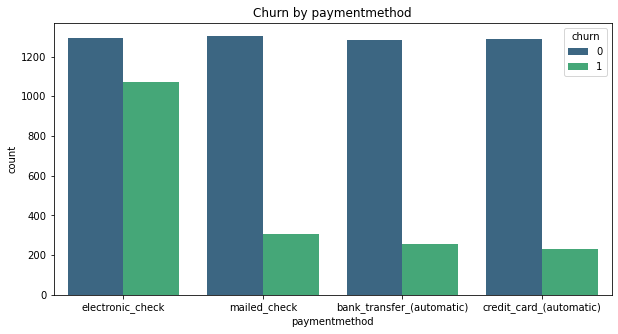

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['gender', 'partner', 'dependents', 'phoneservice', 
                        'multiplelines', 'internetservice', 'onlinesecurity',
                        'onlinebackup', 'deviceprotection', 'techsupport', 
                        'streamingtv', 'streamingmovies', 'contract',
                        'paperlessbilling', 'paymentmethod']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue='churn', palette='viridis')
    plt.title(f"Churn by {feature}")
    plt.show()


In [128]:
# create a function that display all the categorical features ; 
def plot_all_c(df , list_name_features , target_variable):
    for c in list_name_features:
        plt.figure(figsize=(10, 5))
        sns.countplot(data = df  , x = df[c] , hue = df[target_variable] , palette = "viridis" )
        plt.title(f"churn by {c}")
        plt.show

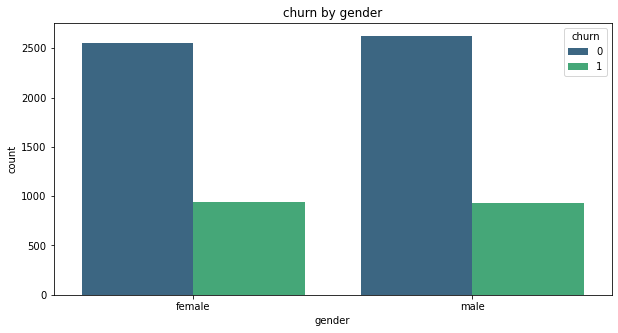

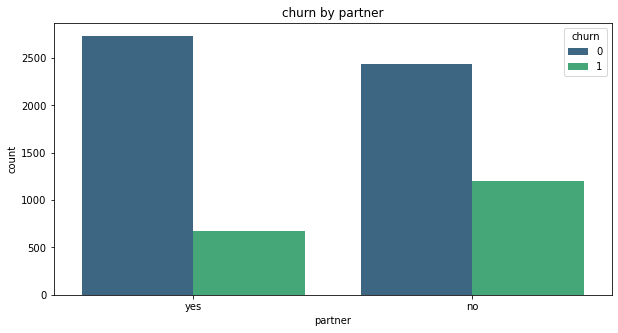

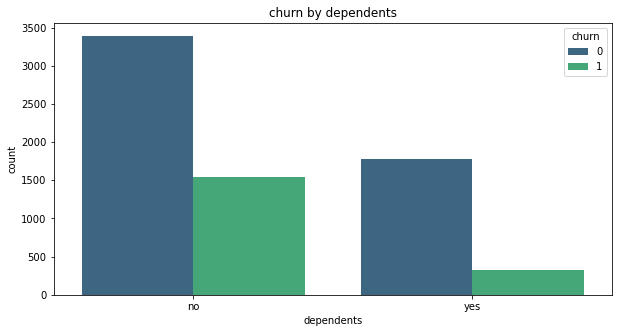

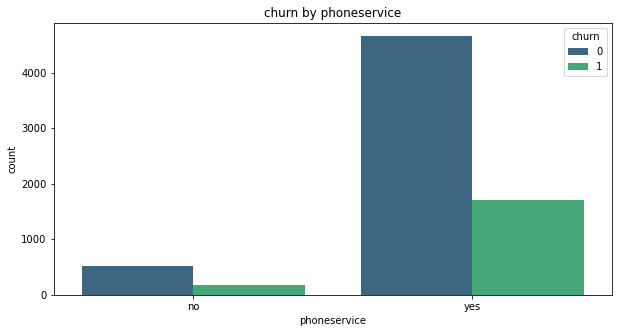

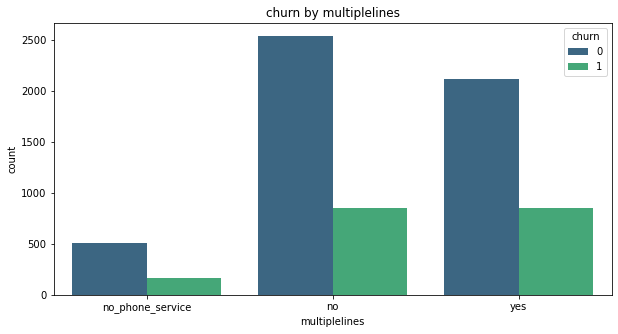

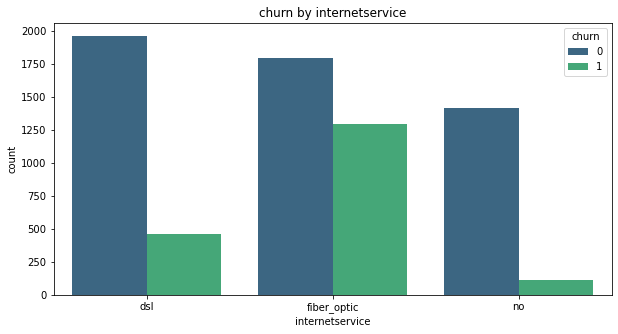

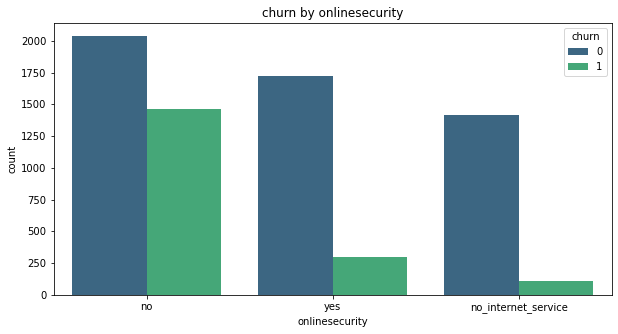

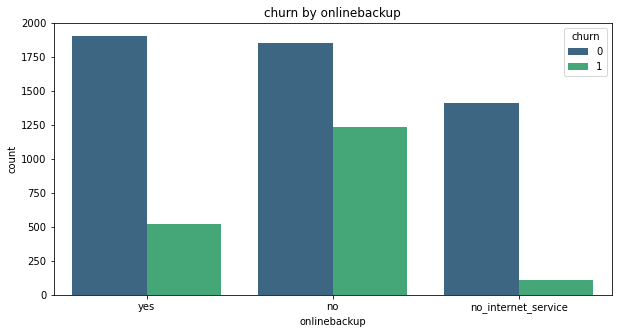

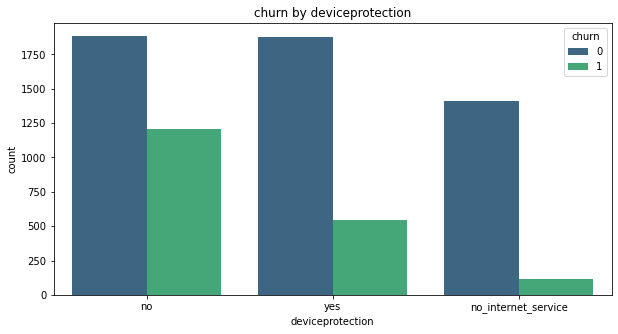

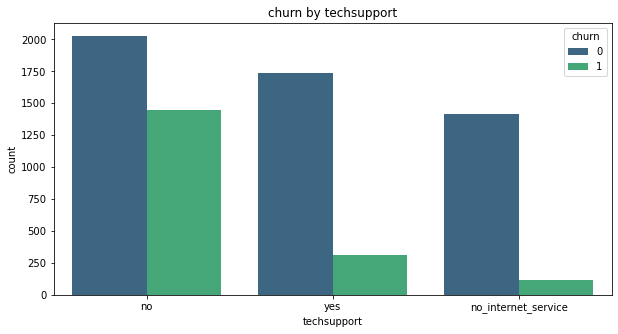

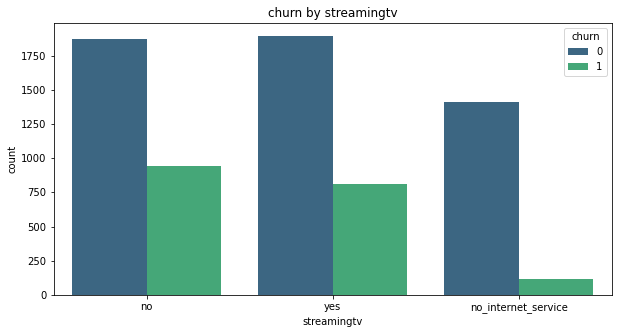

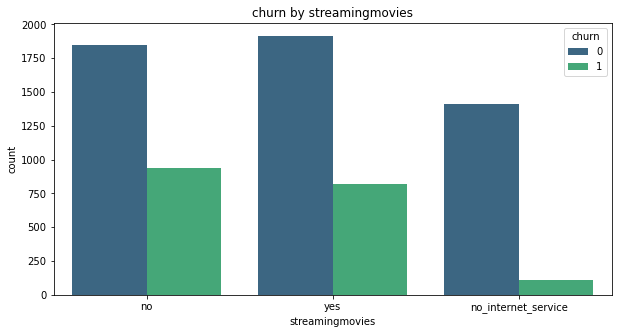

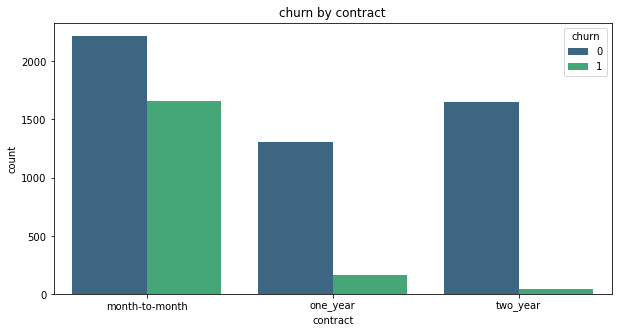

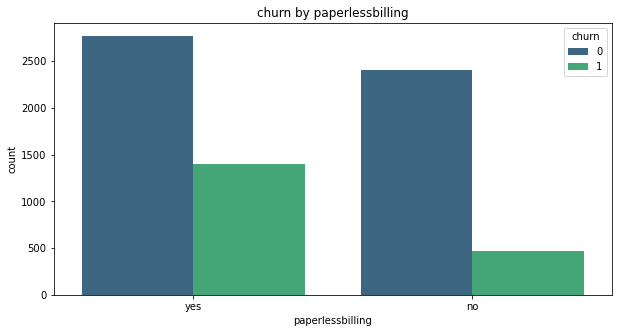

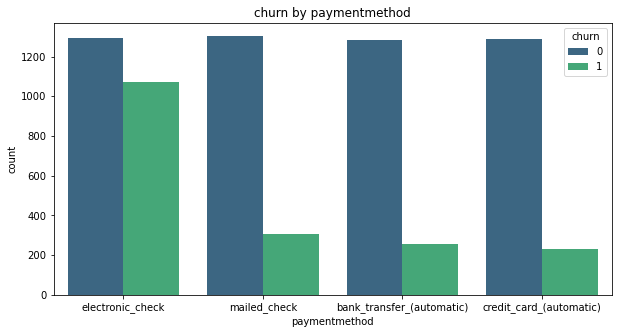

In [129]:
plot_all_c(df,categorical_features , target_variable = "churn" )

In [131]:
cd

C:\Users\lenovo
